In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures


In [2]:
# df = pd.read_csv('/Users/shahram/Desktop/Ml-AI/exercise/insurance.csv', index_col=0)
df = pd.read_csv('/Users/shahram/Desktop/Ml-AI/exercise/insurance.csv')
# df

In [3]:
df = df.rename(columns={'Unnamed: 0': 'id'})
df['sex'] = df['sex'].map({'female':0, 'male':1}) # female=0, male=1
df['smoker'] = df['smoker'].map({'yes':0, 'no':1}) # yes = 0, no=1
df['region'] = df['region'].map({'southwest':0, 'northwest':1, 'southeast':2, 'northeast':3}) # southwest =0, northwest=1, southeast=2, northeast=3


In [4]:
# df

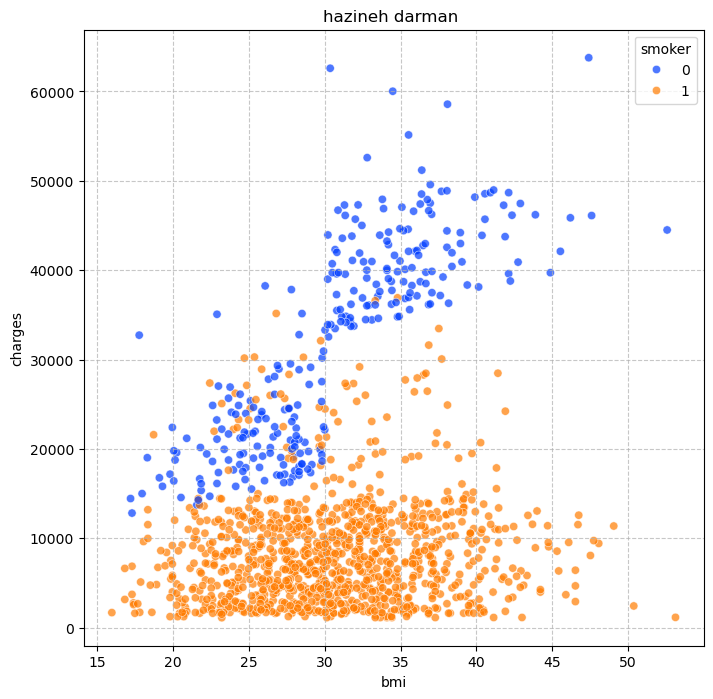

In [5]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='bright', alpha=0.7)
plt.title('hazineh darman ')
plt.grid(True, linestyle='--', alpha=0.7)
# plt.grid()
plt.show()

In [6]:
X = df.drop(columns=['charges'])
# X
y = df.drop(columns=['id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']) 
# y

In [7]:
# X

In [8]:
# y

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# y = a1x1 + a2x2 + a2x3 + a4x4 + a5x5 + a6x6 + a7x7 + b

In [11]:
# X_train.shape

In [12]:
# X_test.shape

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
slope = linear_model.coef_[0]
print(slope)

[ 6.02073654e-01  2.62552073e+02  1.46006867e+02  3.35791607e+02
  4.23809286e+02 -2.35848329e+04  2.28264642e+02]


In [15]:
intercept = linear_model.intercept_[0]
print(intercept)

10207.007606025352


In [16]:
print(f'y= {slope}x + {intercept}')

y= [ 6.02073654e-01  2.62552073e+02  1.46006867e+02  3.35791607e+02
  4.23809286e+02 -2.35848329e+04  2.28264642e+02]x + 10207.007606025352


In [17]:
y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)
# print(y_pred_test)
# print(y_pred_train)
# y_test - y_pred

In [18]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.76702788972747

In [19]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.7421986037801195

In [20]:
mse_test = mean_squared_error(y_test, y_pred_test)
# mse_test
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5844.6021615969485


In [21]:
mse_train =mean_squared_error(y_train, y_pred_train)
mse_train
rmse_train = np.sqrt(mse_train)
print(rmse_train)

6144.896768420186


In [22]:
print('r2_test:', r2_test, '\n', 'rmse_test:', rmse_test)
print('r2_train:', r2_train, '\n', 'rmse_train:', rmse_train)

r2_test: 0.76702788972747 
 rmse_test: 5844.6021615969485
r2_train: 0.7421986037801195 
 rmse_train: 6144.896768420186


In [23]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [24]:
# X_train_poly.shape

In [25]:
# X_test_poly

In [26]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_train_pred_poly = model_poly.predict(X_train_poly)
y_test_pred_poly = model_poly.predict(X_test_poly)

In [28]:
mse_train = mean_squared_error(y_train, y_train_pred_poly)
print(mse_train)
mse_test = mean_squared_error(y_test, y_test_pred_poly)
print(mse_test)

23476688.805946864
21198190.24008335


In [29]:
rmse_test_poly = np.sqrt(mse_test)
print(f'{rmse_test_poly:.0f}')
rmse_train_poly = np.sqrt(mse_train)
print(f'{rmse_train_poly:.0f}')

4604
4845


In [30]:
r2_train_poly = r2_score(y_train, y_train_pred_poly)
print(f'{r2_train_poly:.2f}')
r2_test_poly = r2_score(y_test, y_test_pred_poly)
print(f'{r2_test_poly:.2f}')

0.84
0.86


In [31]:
results_df = pd.DataFrame({
    'مدل': ['رگرسیون خطی', 'رگرسیون خطی', 'رگرسیون چندجمله‌ای', 'رگرسیون چندجمله‌ای'],
    'داده‌ها': ['Train', 'Test', 'Train', 'Test'],
    'RMSE': [rmse_train, rmse_test, rmse_train_poly, rmse_test_poly],
    'R² Score': [r2_train, r2_test, r2_train_poly, r2_test_poly],
})

In [32]:
results_df

,مدل,داده‌ها,RMSE,R² Score
0,رگرسیون خطی,Train,6144.896768,0.742199
1,رگرسیون خطی,Test,5844.602162,0.767028
2,رگرسیون چندجمله‌ای,Train,4845.274895,0.839715
3,رگرسیون چندجمله‌ای,Test,4604.149242,0.855425


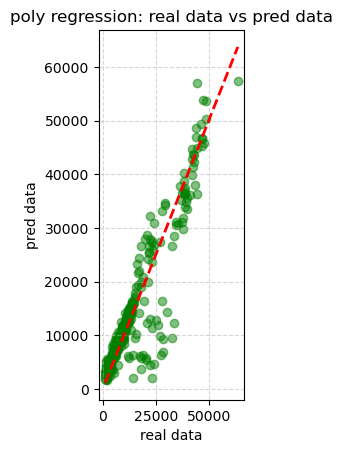

In [33]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred_poly, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('poly regression: real data vs pred data')
plt.xlabel('real data')
plt.ylabel('pred data')
plt.grid(True, linestyle='--', alpha=0.5)

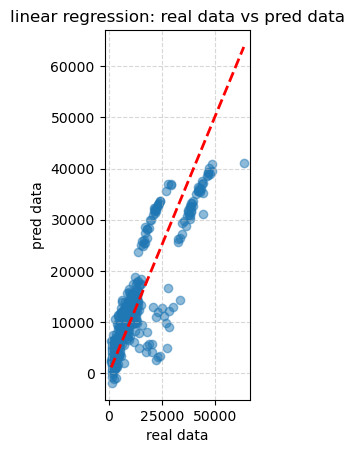

In [34]:
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('linear regression: real data vs pred data')
plt.xlabel('real data')
plt.ylabel('pred data')
plt.grid(True, linestyle='--', alpha=0.5)

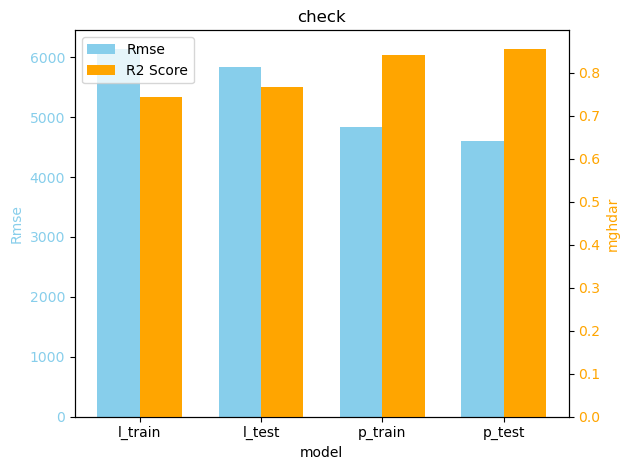

In [35]:
#plt.subplot(1, 3, 3)

model = ['l_train', 'l_test', 'p_train', 'p_test']
rmse_values = [rmse_train, rmse_test, rmse_train_poly, rmse_test_poly]
r2_values = [r2_train, r2_test, r2_train_poly, r2_test_poly]

x = np.arange(len(model))
width = 0.35

fig, ax1 = plt.subplots()

color = 'skyblue'
ax1.set_xlabel('model')
ax1.set_ylabel('Rmse', color=color)
bars1 = ax1.bar(x - width / 2, rmse_values, width, label='Rmse', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color='orange'
ax2.set_ylabel('r2 score', color=color)
bars2 = plt.bar(x + width / 2, r2_values, width, label='R2 Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('check')
plt.xlabel('model')
plt.ylabel('mghdar')
plt.xticks(x, model)
#plt.legend()
plt.grid(True, linestyle='--', alpha=0.5, axis='x')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


plt.tight_layout()
plt.show()

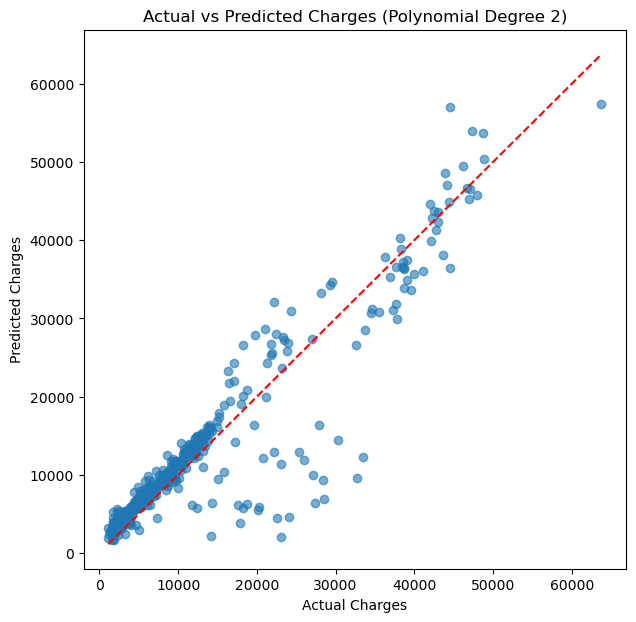

In [36]:
y_test_pred_poly = model_poly.predict(X_test_poly)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Polynomial Degree 2)")
plt.show()

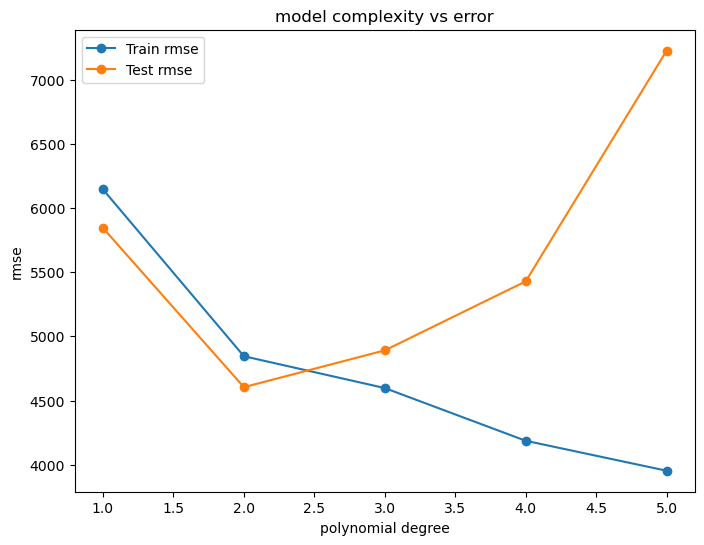

In [37]:
degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []

for deg in degrees:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_tr_poly = poly.fit_transform(X_train)
    X_te_poly = poly.transform(X_test)


    model = LinearRegression()
    model.fit(X_tr_poly, y_train)

    train_errors.append(np.sqrt(mean_squared_error(y_train, model.predict(X_tr_poly))))
    test_errors.append(np.sqrt(mean_squared_error(y_test, model.predict(X_te_poly))))
    
plt.figure(figsize=(8, 6))

plt.plot(degrees, train_errors, marker='o', label='Train rmse')
plt.plot(degrees, test_errors, marker='o', label='Test rmse')

plt.xlabel('polynomial degree')
plt.ylabel('rmse')
plt.title('model complexity vs error')
plt.legend()
plt.show()
    